In [1]:
from PW_explorer.pwe_nb_helper import ASPRules
from LeanEuler.lean_euler import LeanEuler

In [4]:
#%load_ext PWE_NB_Extension

In [5]:
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
from IPython.display import Image

In [6]:
with open('ISO_DHS_Asia_brief.txt', 'r') as f:
    cleantax_sample_file = f.read().splitlines()
print("\n".join(cleantax_sample_file))

#Taxonomy 1 ISO 3166 with Regional Code from UN: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes
#Taxonomy 2 Homeland Secuirty https://www.dhs.gov/geographic-regions

taxonomy ISO ISO3166
(Asia China VietNam AsiaOther)
(China HongKong Macao Taiwan ChinaOther)

taxonomy DHS HomelandSecurity
(Asia China ChinaOther HongKong Macau Taiwan Vietnam AsiaOther)

articulation ISO-DHS ISO-Homeland
[ISO.Asia equals DHS.Asia]
[ISO.HongKong equals DHS.HongKong]
[ISO.Macao equals DHS.Macau]
[ISO.ChinaOther equals DHS.ChinaOther]
[ISO.VietNam equals DHS.Vietnam]
[ISO.AsiaOther equals DHS.AsiaOther]


In [7]:
rel_desc_dfs, taxonomy_trees = LeanEuler.parse_cleantax(cleantax_sample_file)


In [8]:
rel_desc_dfs

,Node1,Relation,Node2
0,"""ISO_Asia""",parent,"""ISO_China"""
1,"""ISO_Asia""",parent,"""ISO_VietNam"""
2,"""ISO_Asia""",parent,"""ISO_AsiaOther"""
3,"""ISO_China""",parent,"""ISO_HongKong"""
4,"""ISO_China""",parent,"""ISO_Macao"""
5,"""ISO_China""",parent,"""ISO_Taiwan"""
6,"""ISO_China""",parent,"""ISO_ChinaOther"""
7,"""DHS_Asia""",parent,"""DHS_China"""
8,"""DHS_Asia""",parent,"""DHS_ChinaOther"""
9,"""DHS_Asia""",parent,"""DHS_HongKong"""


In [9]:
taxonomy_trees

{'ISO': {'ISO': Node('/ISO'),
  'Asia': Node('/ISO/"ISO_Asia"'),
  'China': Node('/ISO/"ISO_Asia"/"ISO_China"'),
  'VietNam': Node('/ISO/"ISO_Asia"/"ISO_VietNam"'),
  'AsiaOther': Node('/ISO/"ISO_Asia"/"ISO_AsiaOther"'),
  'HongKong': Node('/ISO/"ISO_Asia"/"ISO_China"/"ISO_HongKong"'),
  'Macao': Node('/ISO/"ISO_Asia"/"ISO_China"/"ISO_Macao"'),
  'Taiwan': Node('/ISO/"ISO_Asia"/"ISO_China"/"ISO_Taiwan"'),
  'ChinaOther': Node('/ISO/"ISO_Asia"/"ISO_China"/"ISO_ChinaOther"')},
 'DHS': {'DHS': Node('/DHS'),
  'Asia': Node('/DHS/"DHS_Asia"'),
  'China': Node('/DHS/"DHS_Asia"/"DHS_China"'),
  'ChinaOther': Node('/DHS/"DHS_Asia"/"DHS_ChinaOther"'),
  'HongKong': Node('/DHS/"DHS_Asia"/"DHS_HongKong"'),
  'Macau': Node('/DHS/"DHS_Asia"/"DHS_Macau"'),
  'Taiwan': Node('/DHS/"DHS_Asia"/"DHS_Taiwan"'),
  'Vietnam': Node('/DHS/"DHS_Asia"/"DHS_Vietnam"'),
  'AsiaOther': Node('/DHS/"DHS_Asia"/"DHS_AsiaOther"')}}

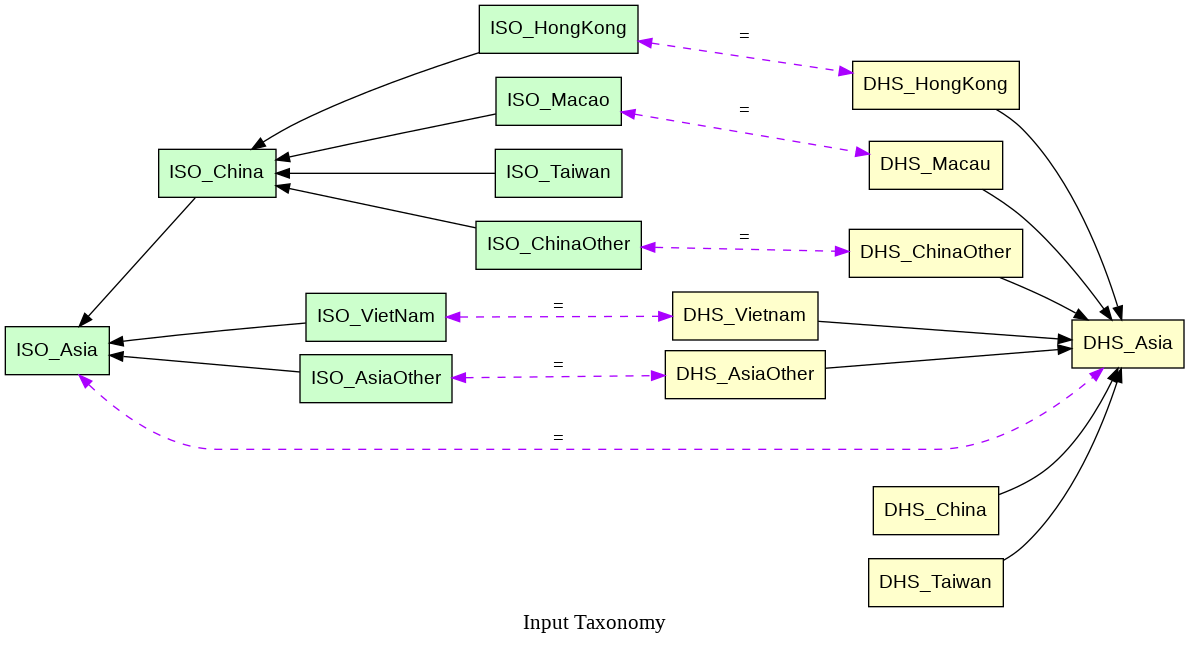

In [10]:
input_constraints_g = LeanEuler.visualize_input(rel_desc_dfs, taxonomy_trees)
draw(input_constraints_g)

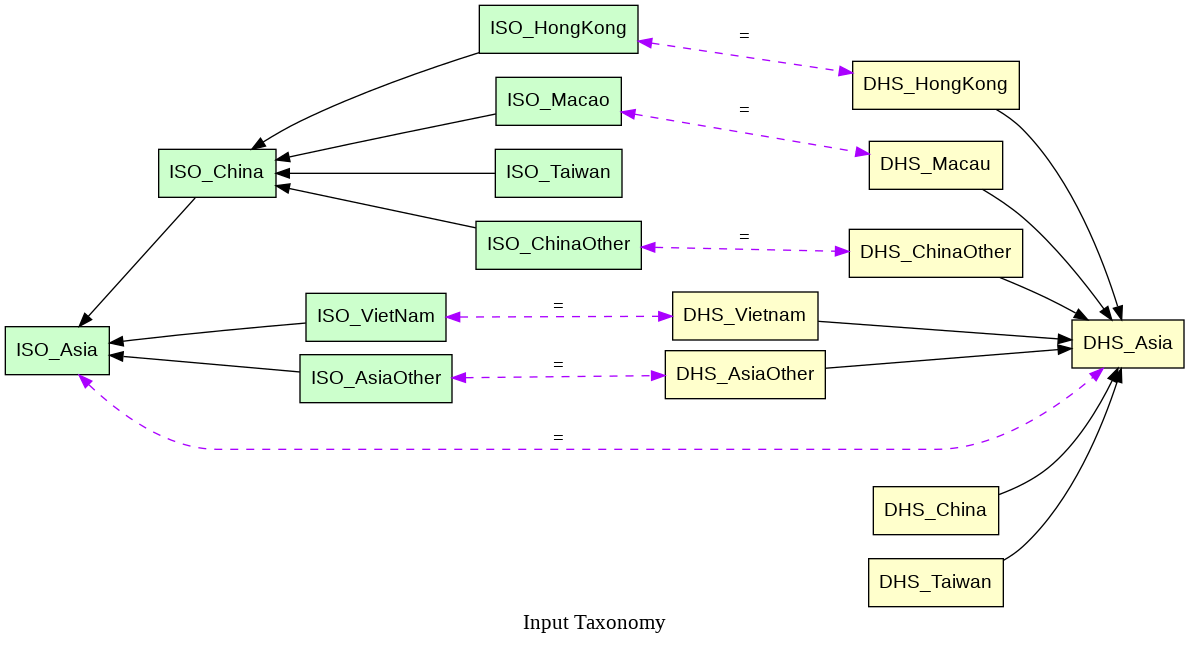

In [11]:
# Directly from the file (skipping the intermediate step)
input_constraints_g = LeanEuler.visualize_input_from_cleantax(cleantax_sample_file)
draw(input_constraints_g)

In [12]:
euler_asp_alignment_rules = LeanEuler.gen_asp_rules(rel_desc_dfs, taxonomy_trees, encoding='rcc')
ASPRules("\n".join(euler_asp_alignment_rules))

'%RCC RULES:\n\neq(X,Y) :- eq(X,Z), eq(Z,Y).\ndr(X,Y) :- eq(X,Z), dr(Z,Y).\npp(X,Y) :- eq(X,Z), pp(Z,Y).\npi(X,Y) :- eq(X,Z), pi(Z,Y).\npo(X,Y) :- eq(X,Z), po(Z,Y).\n\ndr(X,Y) :- dr(X,Z), eq(Z,Y).\n1 {dr(X,Y) ; pp(X,Y) ; po(X,Y)} :- dr(X,Z), pp(Z,Y).\n1 {dr(X,Y) ; pi(X,Y) ; po(X,Y)} :- dr(X,Z), pi(Z,Y).\n1 {dr(X,Y) ; pp(X,Y) ; po(X,Y)} :- dr(X,Z), po(Z,Y).\n\npp(X,Y) :- pp(X,Z), eq(Z,Y).\ndr(X,Y) :- pp(X,Z), dr(Z,Y).\npp(X,Y) :- pp(X,Z), pp(Z,Y).\ndr(X,Y) ; pp(X,Y) ; po(X,Y) :- pp(X,Z), po(Z,Y).\n\npi(X,Y) :- pi(X,Z), eq(Z,Y).\n1 {dr(X,Y) ; pi(X,Y) ; po(X,Y)} :- pi(X,Z), dr(Z,Y).\npi(X,Y) :- pi(X,Z), pi(Z,Y).\n1 {pi(X,Y) ; po(X,Y)} :- pi(X,Z), po(Z,Y).\n\npo(X,Y) :- po(X,Z), eq(Z,Y).\n1 {dr(X,Y) ; pi(X,Y) ; po(X,Y)} :- po(X,Z), dr(Z,Y).\n1 {pp(X,Y) ; po(X,Y)} :- po(X,Z), pp(Z,Y).\n1 {dr(X,Y) ; pi(X,Y) ; po(X,Y)} :- po(X,Z), pi(Z,Y).\n\nu(X) :- dr(X,_).\nu(X) :- dr(_,X).\nu(X) :- eq(X,_).\nu(X) :- eq(_,X).\nu(X) :- po(X,_).\nu(X) :- po(_,X).\nu(X) :- pp(X,_).\nu(X) :- pp(_,X).\nu(X) :- pi(X,_).\nu(X) :- pi(_,X).\nu(X) :- bl(_,X).\nu(X) :- bl(X,_).\n\neq(X,X) :- u(X).\npi(X,Y) :- pp(Y,X).\npp(X,Y) :- pi(Y,X).\neq(X,Y) :- eq(Y,X).\npo(X,Y) :- po(Y,X).\ndr(X,Y) :- dr(Y,X).\ndr(Y,Z) :- bl(X,Y), bl(X,Z), Y != Z.\npp(Y,X) :- bl(X,Y).\n\n1 {eq(X,Y) ; dr(X,Y) ; pp(X,Y) ; pi(X,Y) ; po(X,Y)} :- u(X), u(Y), X != Y.\n\n:- eq(X,Y), dr(X,Y).\n:- eq(X,Y), pp(X,Y).\n:- eq(X,Y), pi(X,Y).\n:- eq(X,Y), po(X,Y).\n:- dr(X,Y), pp(X,Y).\n:- dr(X,Y), pi(X,Y).\n:- dr(X,Y), po(X,Y).\n:- pp(X,Y), pi(X,Y).\n:- pp(X,Y), po(X,Y).\n:- pi(X,Y), po(X,Y).\n\n%TAXONOMY DESC RULES\n\nbl("ISO_Asia","ISO_China").\nbl("ISO_Asia","ISO_VietNam").\nbl("ISO_Asia","ISO_AsiaOther").\nbl("ISO_China","ISO_HongKong").\nbl("ISO_China","ISO_Macao").\nbl("ISO_China","ISO_Taiwan").\nbl("ISO_China","ISO_ChinaOther").\nbl("DHS_Asia","DHS_China").\nbl("DHS_Asia","DHS_ChinaOther").\nbl("DHS_Asia","DHS_HongKong").\nbl("DHS_Asia","DHS_Macau").\nbl("DHS_Asia","DHS_Taiwan").\nbl("DHS_Asia","DHS_Vietnam").\nbl("DHS_Asia","DHS_AsiaOther").\neq("ISO_Asia","DHS_Asia").\neq("ISO_HongKong","DHS_HongKong").\neq("ISO_Macao","DHS_Macau").\neq("ISO_ChinaOther","DHS_ChinaOther").\neq("ISO_VietNam","DHS_Vietnam").\neq("ISO_AsiaOther","DHS_AsiaOther").'

In [13]:
# Directly from the file (short-circuiting)
euler_asp_alignment_rules = LeanEuler.gen_asp_rules_from_cleantax(cleantax_sample_file, encoding='mnpw')
ASPRules("\n".join(euler_asp_alignment_rules))

'r(1..55).\n\n% Region Meanings\nin(X, M) :- r(M), concept(X, T, N), N1=N+1, bit(M, T, N1).\nout(X, M) :- r(M), concept(X, T, N), N1=N+1, not bit(M, T, N1).\nin(X, M) :- r(M), concept2(X, _), not out(X, M).\nirs(M) :- in(X, M), out(X, M), r(M), concept2(X, _).\n\n% Region Constraints\nirs(X) :- ir(X, _).\nvrs(X) :- vr(X, _).\nvr(X, X) :- not irs(X), r(X).\nir(X, X) :- not vrs(X), r(X).\n:- vrs(X), irs(X).\n\nconcept2(A, B) :- concept(A,B,_).\n\n% Taxonomy Description\n\n%  Euler Bit\nbit(M, 0, V) :- r(M), M1=M/1, V = M1 \\ 7.\n\n%  Euler Bit\nbit(M, 1, V) :- r(M), M1=M/7, V = M1 \\ 8.\n\nconcept2("ISO_Asia", 0).\nconcept2("ISO_China", 0).\nconcept("ISO_HongKong", 0, 0).\nconcept("ISO_Macao", 0, 1).\nconcept("ISO_Taiwan", 0, 2).\nconcept("ISO_ChinaOther", 0, 3).\nconcept("ISO_VietNam", 0, 4).\nconcept("ISO_AsiaOther", 0, 5).\nconcept2("DHS_Asia", 1).\nconcept("DHS_China", 1, 0).\nconcept("DHS_ChinaOther", 1, 1).\nconcept("DHS_HongKong", 1, 2).\nconcept("DHS_Macau", 1, 3).\nconcept("DHS_Taiwan", 1, 4).\nconcept("DHS_Vietnam", 1, 5).\nconcept("DHS_AsiaOther", 1, 6).\n\n% "ISO_China" isa "ISO_Asia"\nir(X, r3) :- in("ISO_China", X), out("ISO_Asia", X).\n:- #count {X : vrs(X), in("ISO_China", X), in("ISO_Asia", X)} = 0.\n\n% "ISO_VietNam" isa "ISO_Asia"\nir(X, r4) :- in("ISO_VietNam", X), out("ISO_Asia", X).\n:- #count {X : vrs(X), in("ISO_VietNam", X), in("ISO_Asia", X)} = 0.\n\n% "ISO_AsiaOther" isa "ISO_Asia"\nir(X, r5) :- in("ISO_AsiaOther", X), out("ISO_Asia", X).\n:- #count {X : vrs(X), in("ISO_AsiaOther", X), in("ISO_Asia", X)} = 0.\n\n% "ISO_HongKong" isa "ISO_China"\nir(X, r12) :- in("ISO_HongKong", X), out("ISO_China", X).\n:- #count {X : vrs(X), in("ISO_HongKong", X), in("ISO_China", X)} = 0.\n\n% "ISO_Macao" isa "ISO_China"\nir(X, r13) :- in("ISO_Macao", X), out("ISO_China", X).\n:- #count {X : vrs(X), in("ISO_Macao", X), in("ISO_China", X)} = 0.\n\n% "ISO_Taiwan" isa "ISO_China"\nir(X, r14) :- in("ISO_Taiwan", X), out("ISO_China", X).\n:- #count {X : vrs(X), in("ISO_Taiwan", X), in("ISO_China", X)} = 0.\n\n% "ISO_ChinaOther" isa "ISO_China"\nir(X, r15) :- in("ISO_ChinaOther", X), out("ISO_China", X).\n:- #count {X : vrs(X), in("ISO_ChinaOther", X), in("ISO_China", X)} = 0.\n\n% "DHS_China" isa "DHS_Asia"\nir(X, r37) :- in("DHS_China", X), out("DHS_Asia", X).\n:- #count {X : vrs(X), in("DHS_China", X), in("DHS_Asia", X)} = 0.\n\n% "DHS_ChinaOther" isa "DHS_Asia"\nir(X, r38) :- in("DHS_ChinaOther", X), out("DHS_Asia", X).\n:- #count {X : vrs(X), in("DHS_ChinaOther", X), in("DHS_Asia", X)} = 0.\n\n% "DHS_HongKong" isa "DHS_Asia"\nir(X, r39) :- in("DHS_HongKong", X), out("DHS_Asia", X).\n:- #count {X : vrs(X), in("DHS_HongKong", X), in("DHS_Asia", X)} = 0.\n\n% "DHS_Macau" isa "DHS_Asia"\nir(X, r40) :- in("DHS_Macau", X), out("DHS_Asia", X).\n:- #count {X : vrs(X), in("DHS_Macau", X), in("DHS_Asia", X)} = 0.\n\n% "DHS_Taiwan" isa "DHS_Asia"\nir(X, r41) :- in("DHS_Taiwan", X), out("DHS_Asia", X).\n:- #count {X : vrs(X), in("DHS_Taiwan", X), in("DHS_Asia", X)} = 0.\n\n% "DHS_Vietnam" isa "DHS_Asia"\nir(X, r42) :- in("DHS_Vietnam", X), out("DHS_Asia", X).\n:- #count {X : vrs(X), in("DHS_Vietnam", X), in("DHS_Asia", X)} = 0.\n\n% "DHS_AsiaOther" isa "DHS_Asia"\nir(X, r43) :- in("DHS_AsiaOther", X), out("DHS_Asia", X).\n:- #count {X : vrs(X), in("DHS_AsiaOther", X), in("DHS_Asia", X)} = 0.\n\n% Coverage for "ISO_Asia"\nout("ISO_Asia", X) :- out("ISO_China", X), out("ISO_VietNam", X), out("ISO_AsiaOther", X).\n\n% Coverage for "ISO_China"\nout("ISO_China", X) :- out("ISO_HongKong", X), out("ISO_Macao", X), out("ISO_Taiwan", X), out("ISO_ChinaOther", X).\n\n% Coverage for "DHS_Asia"\nout("DHS_Asia", X) :- out("DHS_China", X), out("DHS_ChinaOther", X), out("DHS_HongKong", X), out("DHS_Macau", X), out("DHS_Taiwan", X), out("DHS_Vietnam", X), out("DHS_AsiaOther", X).\n\n% "ISO_China" ! "ISO_VietNam"\nir(X, r0) :- in("ISO_China", X), in("ISO_VietNam", X).\n:- #count {X : vrs(X), in("ISO_China", X), out("ISO_VietNam", X)} = 0.\n:- #cou

In [14]:
pw_rels_dfs, rel_schemas, pw_objs = LeanEuler.generate_pws(euler_asp_alignment_rules)
pw_rels_dfs.keys()

Number of Models: 1


dict_keys(['u_1', 'bl_2', 'pp_2', 'rel_3', 'dr_2', 'eq_2'])

In [19]:
pws_vizs = LeanEuler.visualize_output(pw_rels_dfs, project_name='ISO_DHS', pws_to_visualize=pw_objs)

Number of Models: 1


KeyError: 'po_2'

In [17]:
t=[draw(pws_vizs[i]) for i in pws_vizs.keys()]

NameError: name 'pws_vizs' is not defined

In [18]:
display(*t)

NameError: name 't' is not defined